# Assignment No 5


In [136]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [137]:
# loading the dataset
data = pd.read_csv("Social_Network_Ads.csv")

In [138]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [139]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [140]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [141]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

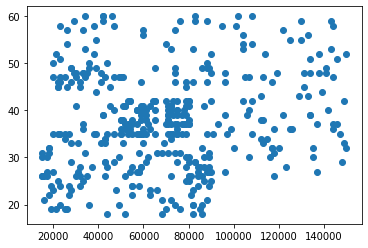

In [142]:
import matplotlib.pyplot as plt
plt.scatter(data = data, x = "EstimatedSalary", y = "Age")

In [143]:
# considering both estimatedsalary and age
x = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values

In [144]:
#considering only age
# x = data.iloc[:, [2]].values
# y = data.iloc[:, 4].values

In [145]:
# creating the Logistic Regression model
model = LogisticRegression(random_state = 0)

In [146]:
# Splitting the dataset into training and testing part
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [147]:
# Preprocessing the values of estimatedsalary and age using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [148]:
# Training the model
model.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

In [149]:
# Predicting the values for testing split
ypred = model.predict(xtest)

In [150]:
# Predicted output of model
ypred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [151]:
# actual output of model
ytest

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [152]:
#confusion matrix 
# [tp, fp]
# [fn, tn]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
cm

array([[65,  3],
       [ 8, 24]])

<AxesSubplot:>

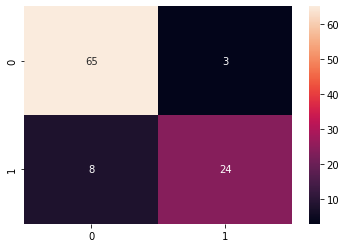

In [153]:
import seaborn as sns
sns.heatmap(cm, annot = True)
# visual representation of confusion matrix using heatmap

In [154]:
# values of tp, fp, tn, fn from confusion matrix
tn, fp, fn, tp = cm.ravel()

print("True Negative Values : ", tn)
print("False Positive Values : ", fp)
print("False Negative Values : ", fn)
print("True Positive Values : ", tp)

True Negative Values :  65
False Positive Values :  3
False Negative Values :  8
True Positive Values :  24


In [155]:
# accuracy of the model is true values / sum of all values
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy : ", accuracy)

Accuracy :  0.89


In [156]:
# error rate of model is false values / sum of all values
# or 
# errorrate = 1 - accuracy
error_rate = (fp + fn) / (tp + tn + fp + fn)
print("Error Rate : ", error_rate)

Error Rate :  0.11


In [157]:
# precision
precision = tp / (tp + fp)
print("Precision : ", precision)

Precision :  0.8888888888888888


In [158]:
# recall
recall = tp / (tp + fn)
print("Recall : ", recall)

Recall :  0.75
